## Let's install Julia first

1. Visit https://julialang.org/downloads/ and get 1.9.2
2. (not recommended using Linux distribution installer, sometimes broken. Unless you're Arch user, then install `julia-bin` from AUR is fine)
3. Run Julia executable, you will be dropped into a REPL:
```
$ > julia
               _
   _       _ _(_)_     |  Documentation: https://docs.julialang.org
  (_)     | (_) (_)    |
   _ _   _| |_  __ _   |  Type "?" for help, "]?" for Pkg help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 1.9.2 (2023-07-05)
 _/ |\__'_|_|_|\__'_|  |  Official https://julialang.org/ release
|__/                   |

julia>
```
4. hit `]` once to switch to Pkg mode, and run
```
pkg> add IJulia, UnROOT, CairoMakie, FHist, MethodAnalysis
```
5. Look at the screen again when waiting for precompilation

(note: a better way is to use a Manifest.toml file to completely capture environment, and also not install project specific packages in your home environment. https://github.com/Moelf/PyHEP_2023_JuliaDemo)


## Why Julia - language perspective

Because it's actually unique from a programming language technical perspective:

Jim Pivarski @ https://indico.cern.ch/event/958432/contributions/4028932/attachments/2113570/3555538/main.pdf

![](https://user-images.githubusercontent.com/5306213/255734909-ff573be4-797b-4e33-8095-128c1f8782e5.png)

## Anyone using Julia in the real world?

- Pfizer (pharma involves lots of differential equations)
- ASML (running on their lithography machines, replacing old MATLAB mixed with C++)
- Climate modeling (CliMA collaboration)
- more

## What's the advantage & Why Julia for HEP
I want to highlight two perspectives:

### Direct explaination
(picked from https://arxiv.org/abs/2306.03675, White Paper on Julia for HEP)

- Easy to prototype for physicists and can be improved to C/C++ like performance within the same language, just by using it more
- Built-in package manager for reproducibility, including binary dependencies
- Designed for technical computing, e.g. includes threads / distributed stdlibs
- more

### Horizontal comparisons
- JIT being the underpinning of recent development in compilation model in both Python: PyPy, Pyston, Pyjion, Numba, Jax, PyTorch, (Python itself soon), Mojo
- and C++ (most relevant for HEP) Cling
- What if we have a language designed with JIT in mind from get go?

(every time I make the Python x JIT list it grows longer)

## Motivation & goals for today

Consider this function taken from Numba's introduction. Numba is great because:
- you don't write C++
- you can write fast loop!

#### Python (Numba)
```python
@jit(nopython=True)
def go_fast(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

In [2]: x = np.arange(100).reshape(10, 10)
In [3]: %timeit go_fast(x)
814 ns ± 5.2 ns (mean ± σ)    # Numba
16500 ns ± 70.5 ns (mean ± σ) # CPython
```

but it does have draw back (all JIT x Python solutions do): it's not compatible with all Python.

the Julia "sale" is that:
- you still avoid C++
- you can write fast anything!*
- there's no compatibility issue and "unhandled" construct, it's just the language itself

#### Julia
```julia
function go_faster(a)
    trace = 0.0
    for i in axes(a, 1)
        trace += tanh(a[i, i])
    end
    return a .+ trace
end
julia> x = reshape(0:99, 10, 10)
julia> @benchmark go_faster($x)
158.947 ns ± 100.451 ns (mean ± σ) # σ due to GC

```

## `Ju` in Jupyter

Now, you can press `backspace` to return to REPL mode, then you can run:
```julia
julia> using IJulia

julia> IJulia.notebook(;dir="<path of repo>")
```

alternatively, you can press `;` to switch to shell mode and cd first, then you can use `pwd()` to get current working path.

In [1]:
readdir(@__DIR__)

5-element Vector{String}:
 ".ipynb_checkpoints"
 "Julia_analysis_demo.ipynb"
 "Manifest.toml"
 "Project.toml"
 "data"

In [2]:
# you can skip these if you installed pkgs into home dir
using Pkg
Pkg.activate(@__DIR__)

  Activating project at `~/SynologyDrive/Harvard/JuliaHEP/PyHEP2023`


## Generic tips

In [3]:
?sin #help mode

search: sin sinh sind sinc sinpi sincos sincosd sincospi asin using isinf asinh



```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

See also [`sind`](@ref), [`sinpi`](@ref), [`sincos`](@ref), [`cis`](@ref), [`asin`](@ref).

# Examples

```jldoctest
julia> round.(sin.(range(0, 2pi, length=9)'), digits=3)
1×9 Matrix{Float64}:
 0.0  0.707  1.0  0.707  0.0  -0.707  -1.0  -0.707  -0.0

julia> sind(45)
0.7071067811865476

julia> sinpi(1/4)
0.7071067811865476

julia> round.(sincos(pi/6), digits=3)
(0.5, 0.866)

julia> round(cis(pi/6), digits=3)
0.866 + 0.5im

julia> round(exp(im*pi/6), digits=3)
0.866 + 0.5im
```

---

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
 0.454649  0.454649
 0.454649  0.454649
```


In [4]:
?x₀² # also useful for unicode reverse lookup

"x₀²" can be typed by x\_0<tab>\^2<tab>

search:

Couldn't find x₀²
Perhaps you meant xor, axes, exit, exp, exp2, Expr, max, In, Out, Pkg or ans


No documentation found.

Binding `x₀²` does not exist.


In [5]:
import UnROOT # import
using UnROOT: LazyTree # import and add select items into namespace
using UnROOT # import and accept all exported items into namespace

In [6]:
@which 2.0 * 3.0

*(x::T, y::T) where T<:Union{Float16, Float32, Float64}
     @ Base float.jl:410

In [7]:
@which 3.0 * rand(2) # scale a vector

*(A::Number, B::AbstractArray)
     @ Base arraymath.jl:21

## Variables, Basic types, and Control flow

Many things already work as you'd expect, from Python experience maybe, just try it:

In [8]:
x = 1
typeof(x)

Int64

In [9]:
# automatically "promoted" to Float64
y = x/5
z = x + 3.0
println("y = $y, z = $z")
typeof(y), typeof(z)

y = 0.2, z = 4.0


(Float64, Float64)

Julia has built-in N-dimensional array type, `Vector` and `Matrix` are special cases where `N = 1` and `2` respectively.

In [10]:
xs = [5, 6, 7, 8] # think of C++ std::vector

4-element Vector{Int64}:
 5
 6
 7
 8

In [11]:
typeof(xs) == Array{Int64, 1} # Vector is 1D special case of Array

true

In [12]:
rand(2, 2) # Matrix is 2D special case 

2×2 Matrix{Float64}:
 0.555202  0.827906
 0.965058  0.331684

In [13]:
# this is a literal 3D tensor
[
    1 2
    3 4 ;;;
    5 6
    7 8 ;;;
    11 22
    33 44
]

2×2×3 Array{Int64, 3}:
[:, :, 1] =
 1  2
 3  4

[:, :, 2] =
 5  6
 7  8

[:, :, 3] =
 11  22
 33  44

Indexing and slicing arrays are intuitive:

In [14]:
xs = [5, 6, 7, 8]
xs[begin : end-1]

3-element Vector{Int64}:
 5
 6
 7

In [15]:
xs[end÷2]# you can do any operation with `begin` and `end` as if they are variable

6

To apply a function in "vectorized style", use broadcast `.`:

In [16]:
xs .+ 10 # "this looks like vectorized style!"

4-element Vector{Int64}:
 15
 16
 17
 18

To "view" into an array without copying underlying data, use `@view` macro

(this is opposite of Numpy, which by default never makes copy)

In [17]:
@view xs[begin:end-1] # modifying a `view` will change original array's data

3-element view(::Vector{Int64}, 1:3) with eltype Int64:
 5
 6
 7

Control flows all look alike™ (no indentation, yes `end`):

```julia
for evt in MyTTree
    process_event(evt)
end
```
---
```julia
while true
    ...
    cond && break
end
```
---
```julia
if cond
    ...
else
    ...
end
```

## Functions
Define a function in-line or multi-line.

In [18]:
# these two are semantically equivalent
f1(x) = x^2

function f2(x)
    return x^2
end;

### Higher-order functions are common
One can have higher-order function as high as one wants, passing functions into and return them from other functions are natural pattern:

In [19]:
filter(iseven, 1:4)

2-element Vector{Int64}:
 2
 4

In [20]:
sort([-2, 3, 1, -4]; by = x -> x^2) # example of an anonymous function

4-element Vector{Int64}:
  1
 -2
  3
 -4

## Types and Multi-dispatch

Forget about class-based OOP for a second, embrace two terms for now: concrete type, and abstract type.

Types has a hierarchical structure, namely types have super type:

In [21]:
# <: reads "is subtype of"
Float64 <: AbstractFloat, Float64 <: Real, Float64 <: Number

(true, true, true)

In [22]:
Float64 <: AbstractFloat <: Real <: Number

true

In [23]:
supertype(AbstractFloat)

Real

In [24]:
subtypes(Real)

4-element Vector{Any}:
 AbstractFloat
 AbstractIrrational
 Integer
 Rational

### Rules for types
1. Abstract type can have many sub types, abstract or concrete, only single inheretance.
2. It's not possible to have instance (i.e "object") of an abstract type.
3. It's not possible to subtype a concrete type further.

(For C++ gurus in the room, point 3 is analogous to the `final` identifier for class, it helps making devirtualization of method table possible, thus increases performance.)

## Source of performance: specialized compilation

**Almost truism: the more type information you can give to compiler, the better it can (at least should) compile to performant machine code.**

Back to the multiple dispatch, you might ask: isn't Julia a dynamic language? Doesn't this multi-dispatch trickry slow things down becuase it sounds like Julia is doing this:
```python
def f(x):
    _T = type(x)
    if _T == A:
        do1(x)
    elif _T == B:
        do2(x)
```

The answer is no: albeit Just-In-Time, everything you run is still fully **compiled**. Here's an effective mental model:

When you call a function, compiler will compile a version of your function based on the argument types before any execution happens. And the compiled program is cached, such that it will be fast as native code the next time you call it.

This is a good place to introduce some inspection/debugging tools which also helps showing Julia's compiler is capable of the same optimization common in fully static language such as C/C++.

Imagine you have the following, fullt generic looking function:

In [25]:
# we could make it slightly less flexible vec::Array{T}
# and res = zero(T)
function mysum(vec)
    res = zero(eltype(vec))
    
    for e in vec
        res += e
    end
    return res
end

mysum (generic function with 1 method)

In [26]:
using MethodAnalysis

In [27]:
methodinstances(mysum)

Core.MethodInstance[]

In [28]:
mysum([1,2,3])

6

In [29]:
methodinstances(mysum)

1-element Vector{Core.MethodInstance}:
 MethodInstance for mysum(::Vector{Int64})

In [30]:
mysum([1.0, 2.0, 3.0])
methodinstances(mysum)

2-element Vector{Core.MethodInstance}:
 MethodInstance for mysum(::Vector{Int64})
 MethodInstance for mysum(::Vector{Float64})

Now let's see what kind of program comes out of Julia's compiler pipeline:

In [31]:
@code_llvm mysum([1,2,3])
# different for each types going in

;  @ In[25]:3 within `mysum`
define i64 @julia_mysum_2918({}* noundef nonnull align 16 dereferenceable(40) %0) #0 {
top:
;  @ In[25]:6 within `mysum`
; ┌ @ array.jl:893 within `iterate` @ array.jl:893
; │┌ @ essentials.jl:10 within `length`
    %1 = bitcast {}* %0 to { i8*, i64, i16, i16, i32 }*
    %2 = getelementptr inbounds { i8*, i64, i16, i16, i32 }, { i8*, i64, i16, i16, i32 }* %1, i64 0, i32 1
    %3 = load i64, i64* %2, align 8
; │└
; │┌ @ int.jl:494 within `<` @ int.jl:487
    %.not = icmp eq i64 %3, 0
; │└
   br i1 %.not, label %L41, label %L17

L17:                                              ; preds = %top
; │┌ @ essentials.jl:13 within `getindex`
    %4 = bitcast {}* %0 to i64**
    %5 = load i64*, i64** %4, align 8
    %6 = load i64, i64* %5, align 8
; └└
;  @ In[25]:8 within `mysum`
; ┌ @ array.jl:893 within `iterate`
; │┌ @ int.jl:494 within `<` @ int.jl:487
    %.not1317.not = icmp eq i64 %3, 1
; │└
   br i1 %.not1317.not, label %L41, label %L35.preheader

L35.prehead

; │┌ @ int.jl:87 within `+`
    %27 = add nuw nsw i64 %value_phi418, 1
; └└
;  @ In[25]:7 within `mysum`
; ┌ @ int.jl:87 within `+`
   %28 = add i64 %24, %26
; └
;  @ In[25]:8 within `mysum`
; ┌ @ array.jl:893 within `iterate`
; │┌ @ int.jl:494 within `<` @ int.jl:487
    %exitcond.not = icmp eq i64 %value_phi418, %3
; │└
   br i1 %exitcond.not, label %L41, label %L35

L41:                                              ; preds = %L35, %middle.block, %L17, %top
   %value_phi9 = phi i64 [ 0, %top ], [ %6, %L17 ], [ %22, %middle.block ], [ %28, %L35 ]
; └
;  @ In[25]:9 within `mysum`
  ret i64 %value_phi9
}


### Bonus: Is Julia actually fast?

It's fair to say Julia has very high ceiling -- there's no particular reason why it's slower than C/C++/Fortran/Rust, if you don't mind writing similarly verbose code. The main attraction is you can get same speed with a fraction of the development effort, and sometimes even faster(!?).

Some advantages in terms of performance against C/C++ - like language:
- unlikely to reinvent something poorly, in C++ people tend to implement lots of stuff from scratch
- low-level code limits the optimization options compiler has, it must do what you asked
 e.g. if you don't use BLAS, and wrote a triple for-loop, compiler can't just come up with BLAS
 

example of the second point in HEP can be found in [this CHEP 2023 talk](https://indico.jlab.org/event/459/contributions/11540/attachments/9410/13651/CHEP2023%20Polyglot%20Jet%20Finding.pdf), where C++ missed a SIMD oppurtunity.

## Bonus: Julia source code to machine code

![](https://user-images.githubusercontent.com/5306213/255769461-a6d7ecad-571a-4ca7-8b6a-9ba831d3e3bd.png)

```julia
# Source code
cos(x) + 2*x
```

In [32]:
# source code as data structure
myexpr = :(cos(x) + 2x)

myexpr == Meta.parse("cos(x) + 2*x")

true

In [33]:
Meta.dump(myexpr)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Expr
      head: Symbol call
      args: Array{Any}((2,))
        1: Symbol cos
        2: Symbol x
    3: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol *
        2: Int64 2
        3: Symbol x


In [34]:
Meta.show_sexpr(myexpr)

(:call, :+, (:call, :cos, :x), (:call, :*, 2, :x))

In [35]:
F(x) = cos(x) + 2*x

F (generic function with 1 method)

In [36]:
@code_typed F(3.2)

CodeInfo(
1 ─ %1 = invoke Main.cos(x::Float64)::Float64
│   %2 = Base.mul_float(2.0, x)::Float64
│   %3 = Base.add_float(%1, %2)::Float64
└──      return %3
) => Float64

In [37]:
@code_llvm F(3.2)

;  @ In[35]:1 within `F`
define double @julia_F_3574(double %0) #0 {
top:
  %1 = call double @j_cos_3576(double %0) #0
; ┌ @ promotion.jl:411 within `*` @ float.jl:410
   %2 = fmul double %0, 2.000000e+00
; └
; ┌ @ float.jl:408 within `+`
   %3 = fadd double %2, %1
; └
  ret double %3
}


In [38]:
@code_native F(3.2)

	.text
	.file	"F"
	.globl	julia_F_3591                    # -- Begin function julia_F_3591
	.p2align	4, 0x90
	.type	julia_F_3591,@function
julia_F_3591:                           # @julia_F_3591
; ┌ @ In[35]:1 within `F`
	.cfi_startproc
# %bb.0:                                # %top
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset %rbp, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register %rbp
	subq	$16, %rsp
	vmovsd	%xmm0, -8(%rbp)                 # 8-byte Spill
	movabsq	$j_cos_3593, %rax
	callq	*%rax
	vmovsd	-8(%rbp), %xmm1                 # 8-byte Reload
                                        # xmm1 = mem[0],zero
; │┌ @ promotion.jl:411 within `*` @ float.jl:410
	vaddsd	%xmm1, %xmm1, %xmm1
; │└
; │┌ @ float.jl:408 within `+`
	vaddsd	%xmm0, %xmm1, %xmm0
; │└
	addq	$16, %rsp
	popq	%rbp
	.cfi_def_cfa %rsp, 8
	retq
.Lfunc_end0:
	.size	julia_F_3591, .Lfunc_end0-julia_F_3591
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


## Analysis in Julia - fast from get go

## Accessing TTrees

UnROOT.jl: reading ROOT data in pure Julia (when we wrote this, we wish we could just wrap some .so)


- It's not as robust as uproot, but close (e.g NanoAOD ✅).

- works with Tables.jl interface, you can using DataFrames.jl or using Arrow.jl to write to disk.

Also supports RNTuple, future proof™, in fact, more robust thanks to RNTuple having a spec!

In [39]:
# const is important for type stability, recall Julia's compilation model
const events = LazyTree("./data/SMHiggsToZZTo4L.root", "Events")

 Row │ Electron_mass    nElectron  luminosityBlock  nMuon   Electron_phi     M ⋯
     │ SubArray{Float3  UInt32     UInt32           UInt32  SubArray{Float3  F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
 1   │ []               0          156              3       []               - ⋯
 2   │ [0.00544,        4          156              0       [0.134, -1       2 ⋯
 3   │ [-0.00609,       2          156              0       [2.18, 1.6       - ⋯
 4   │ [-0.00123]       1          156              7       [-0.643]         - ⋯
 5   │ [0.0117, 0       4          156              0       [1.01, -1.       1 ⋯
 6   │ [-0.00183]       1          156              2       [-0.497]         - ⋯
 7   │ [-0.00183]       1          156              1       [-1.47]          - ⋯
 8   │ [-0.00216]       1          156              0       [-0.633]         - ⋯
 9   │ [-0.0128,        4          156              0       [2.79, -2.       - ⋯
 10  │ []               0   

You can think of `events` as a table (dataframe), except Julia (unlike Numpy) never had the limitation arround jagged array. For example, the `Muon_*` columns are vector of vectors:

In [40]:
first(events.Muon_charge, 4)

4-element Vector{Vector{Int32}}:
 [1, -1, 1]
 []
 []
 [1, -1, -1, 1, -1, -1, 1]

### Loop and vectorized style -- gotta catch them all

At this point you probably have seen various performance trade-offs in Python + C++ land, namely:
- avoid loop in CPython, deligate to C++ to process batch (aka Numpy)
- but this solution excessively allocates for intermediates, especially when program logic is non-trivial

(we will comment on this "vectorzied style -> intermidiates allocation in a moment)

- try Numba when possible
- but Numba never Just™ works when you have complex dependencies (uproot, awkward, or any other C++ stuff)

Julia gives you fast for loop doesn't mean you can only write loops, vectorized style is useful!

In [41]:
using LorentzVectorHEP
one_event = first(events);

# destruct syntax sugar
(; Muon_pt, Muon_eta, Muon_phi, Muon_mass) = one_event

muons = LorentzVectorCyl.(Muon_pt, Muon_eta, Muon_phi, Muon_mass)
#                       ^---- this is broadcast

3-element Vector{LorentzVectorCyl{Float32}}:
 LorentzVectorCyl{Float32}(pt=63.04387, eta=-0.7186822, phi=2.968006, mass=0.10565837)
 LorentzVectorCyl{Float32}(pt=38.120346, eta=-0.879457, phi=-1.032475, mass=0.10565837)
 LorentzVectorCyl{Float32}(pt=4.0486875, eta=-0.32076442, phi=1.0385035, mass=0.10565837)

## Reconstruct H->ZZ->4 mu

Ignore electrons for a moment:
1. Require exactly 2 positive and 2 negative muons
2. Sum up the 4-vectors of these four muons
3. fill histogram

### Part 1, early continue if doesn't pass selection

```julia
(; Muon_charge) = evt

if length(Muon_charge) != 4
    continue
end

sum(Muon_charge) != 0 && continue # shortcut if-else
```

### Part 2, reconstruct the higgs
`fast_mass()` also available

```julia

(; Muon_pt, Muon_eta, Muon_phi, Muon_mass) = evt

higgs_4vector = sum(LorentzVectorCyl.(Muon_pt, Muon_eta, Muon_phi, Muon_mass))
    
higgs_mass = mass(higgs_4vector)
```

### Part 3, fill histogram
```julia
higgs_mass = mass(higgs_4vector)
```


In [42]:
using FHist

function main_looper(events)
    hist = Hist1D(Float64; bins=90:140)
    for evt in events
        ### Part 1
        (; Muon_charge) = evt
        if length(Muon_charge) != 4
            continue
        end
        sum(Muon_charge) != 0 && continue # shortcut if-else
        
        ### Part 2
        (; Muon_pt, Muon_eta, Muon_phi, Muon_mass) = evt
        higgs_4vector = sum(LorentzVectorCyl.(Muon_pt, Muon_eta, Muon_phi, Muon_mass))
        higgs_mass = mass(higgs_4vector)
        
        ### Part 3
        push!(hist, higgs_mass)
    end
    
    
    return hist
end

main_looper (generic function with 1 method)

more benchmarks: https://github.com/Moelf/UnROOT_RDataFrame_MiniBenchmark

In [43]:
h1 = @time main_looper(events) # file size too small to be realistic, but I guess it's not slow

  0.062103 seconds (22.65 k allocations: 51.361 MiB, 14.13% gc time)


edges: 90:140
bin counts: [39.0, 31.0, 30.0, 32.0, 40.0, 38.0, 39.0, 42.0, 49.0, 56.0  …  31.0, 33.0, 30.0, 16.0, 7.0, 12.0, 13.0, 4.0, 10.0, 7.0]
total count: 18445.0

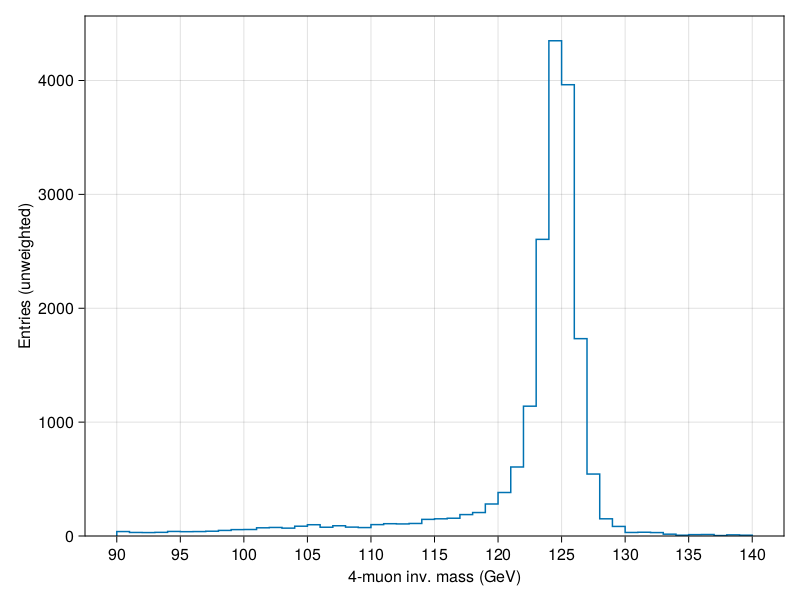

In [44]:
using CairoMakie

stairs(main_looper(events);
    axis = (xlabel="4-muon inv. mass (GeV)",
        xticks = 0:5:140,
        ylabel="Entries (unweighted)",
        limits=(nothing, nothing, 0, nothing)
    )
)

## Bonus: Implement the uproot version from yesterday

Recall what we saw yesterday:
```python
muplus = events.muon[events.muon.charge > 0]
muminus = events.muon[events.muon.charge < 0]

mu1, mu2 = ak.unzip(ak.cartesian((muplus, muminus)))

plt.hist(ak.ravel(
    
    (mu1 + mu2).mass

), bins=100, range=(0, 100));


```

this makes pair-wise mass (within each event) between all possible combinations of mu+ mu- pair.

Hint:
- feel free to make masks out of `Muon_charge .> 0` and ` .< 0`, broadcast
- `Iterators.product` instead of `ak.cartesian`
- instead of `ak.ravel`, a loop `for (m1, m2) in Iterators.product(...)` might be easier

*Solution in next cell in notebook*

In [45]:
using FHist

function main_2(events)
    hist = Hist1D(Float64; bins=0:100)
    for evt in events
        ### Part 1
        (; Muon_charge) = evt
        muplus = Muon_charge .> 0
        muminus = Muon_charge .< 0
        
        (; Muon_pt, Muon_eta, Muon_phi, Muon_mass) = evt
        muons = LorentzVectorCyl.(Muon_pt, Muon_eta, Muon_phi, Muon_mass)
        
        muons_product = @views Iterators.product(muons[muplus], muons[muminus])
        
        for (mu1, mu2) in muons_product
            higgs_mass = fast_mass(mu1, mu2)
            push!(hist, higgs_mass)
        end
    end
    
    
    return hist
end

main_2 (generic function with 1 method)

In [46]:
@time main_2(events)

  0.202219 seconds (2.10 M allocations: 174.800 MiB, 19.69% gc time)


edges: 0:100
bin counts: [1054.0, 1315.0, 1645.0, 2006.0, 2436.0, 3286.0, 3531.0, 3401.0, 3382.0, 3509.0  …  8806.0, 8347.0, 5812.0, 3195.0, 1723.0, 962.0, 548.0, 337.0, 212.0, 151.0]
total count: 271500.0

## Better vectorized style via fusion

Although Julia's main "sale point" (portraited by me here) is "just write for loops" and it will work & fast, 

Quoting some gripes summarized by Jim yesterday:

>  - Allocating memory is expensive (a search through fragmented RAM).
>  - Accessing new areas of RAM is expensive because it bypasses the CPU caching mechanism.
>  - Most mathematical calculations are faster than fetching data from RAM (into CPU caches).

While they can't be fundamentally avoided (i.e. if you broadcast, you ask for allocation) unless with really advanced compiler optimization (e.g. escape analysis sees allocated array never gets used, optiized it away).

But it can be improved via [Loop fusion](https://julialang.org/blog/2017/01/moredots/).

You've seen Julia has special syntax for broadcasting:

```julia
myfunc.(arr .+ 1) .* 2
```

naively, and indeed in Numpy, this creates 2 copies of unnecessary intermediate copies size `O(arr)`, which is especially problematic if `arr` is a "branch" of a `TTree` backed by on-disk bytes, often O(GB).

How does having the "dot" syntax in Julia help?

From Numpy's perspective, there's no way around it: in order to know what to do for `myfunc(...)`, you have to compute `...` first, which result in allocation. There's no "handle" for Numpy to see the whole picture, because that's at syntax level and defined by Python.

A possible mitigation is to make everything lazy, then you just `.compute()` in the end, this is useful in many cases for more reasons, but is simply not how "normal Python" works and creates the problem of "how much do/can you delay anyway".

If we look at what the code translates to in Julia:

In [47]:
Meta.@lower myfunc.(arr .+ 1) .* 2

:($(Expr(:thunk, CodeInfo(
    @ none within `top-level scope`
1 ─ %1 = *
│   %2 = myfunc
│   %3 = Base.broadcasted(+, arr, 1)
│   %4 = Base.broadcasted(%2, %3)
│   %5 = Base.broadcasted(%1, %4, 2)
│   %6 = Base.materialize(%5)
└──      return %6
))))

we see that this syntax gets lowered to a special construct, and they gets nested together before "materialized" into the result, effectively re-writing your broadcasting code into the ideal form:

```julia
pre_allocate = Array{inferred type, dimension of arr}(undef, shape(arr))

for i in eachindex(arr)
    pre_allocate[i] = mufunc(arr[i] + 1) * 2
end

return pre_allocate
```

and this will be as fast as ~~humanly~~ computerly possible

## Scale locally (saturate I/O)
Multi-threading is easy:

In [48]:
function main_looper_MT(events)
    hist = Hist1D(Float64; bins=90:140)
    Threads.@threads for evt in events
        ### Part 1
        (; Muon_charge) = evt
        if length(Muon_charge) != 4
            continue
        end
        sum(Muon_charge) != 0 && continue # shortcut if-else
        
        ### Part 2
        (; Muon_pt, Muon_eta, Muon_phi, Muon_mass) = evt
        higgs_4vector = sum(LorentzVectorCyl.(Muon_pt, Muon_eta, Muon_phi, Muon_mass))
        higgs_mass = mass(higgs_4vector)
        
        ### Part 3
        atomic_push!(hist, higgs_mass)
    end
    
    
    return hist
end

main_looper_MT (generic function with 1 method)

In [49]:
h1_MT = @time main_looper_MT(events) # file too small to help

  0.115506 seconds (231.50 k allocations: 102.094 MiB, 10.20% gc time, 257.10% compilation time)


edges: 90:140
bin counts: [39.0, 31.0, 30.0, 32.0, 40.0, 38.0, 39.0, 42.0, 49.0, 56.0  …  31.0, 33.0, 30.0, 16.0, 7.0, 12.0, 13.0, 4.0, 10.0, 7.0]
total count: 18445.0

## Scale distributedly

No runnable demo here, but:
- https://indico.jlab.org/event/459/contributions/11560/attachments/9692/14160/High-performance%20end-user%20analysis%20with%20Julia%20language.pdf#page=29
- https://jiling.web.cern.ch/jiling/public/ClusterManager.pdf#page=10

tl;dr; Julia has Dask primitives built-in, but lacking wholesale solution such as Dask, keep an eye out for: https://github.com/JuliaParallel/Dagger.jl